In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Codice che calcola la media degli arrivi considerando i 3 datasets

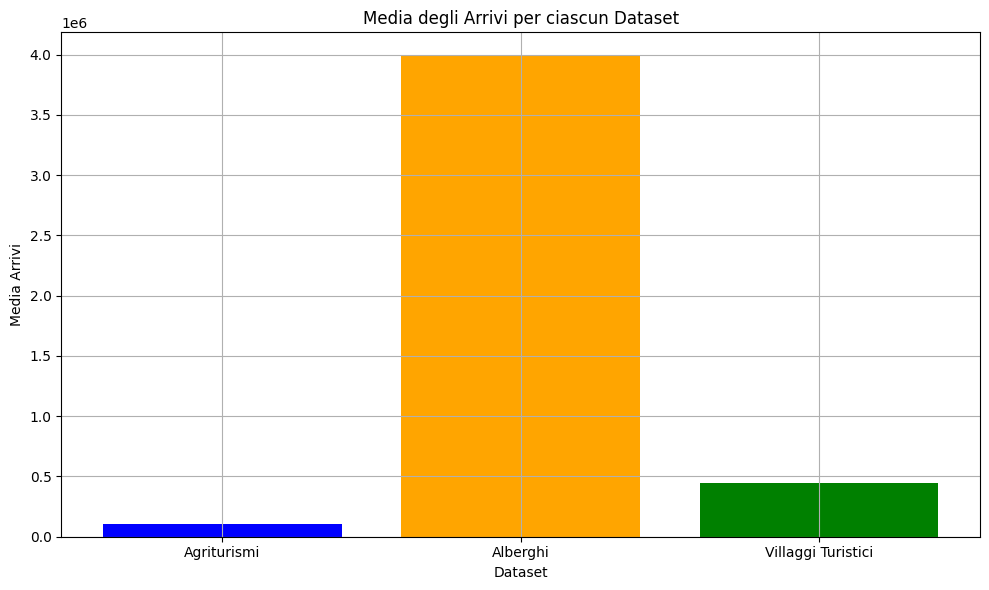

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def calcola_media_arrivi(percorso_file):
    df = pd.read_csv(percorso_file, sep=';', encoding='UTF-8')
    media_arrivi = df['Arrivi'].mean()
    return media_arrivi

def graficoMedieArrivi(percorso_file1, percorso_file2, percorso_file3):
    # Calcola la media degli arrivi per ciascun file
    media1 = calcola_media_arrivi(percorso_file1)
    media2 = calcola_media_arrivi(percorso_file2)
    media3 = calcola_media_arrivi(percorso_file3)

    # Crea un dataframe per le medie
    df_medie = pd.DataFrame({
        'Dataset': ['Agriturismi', 'Alberghi', 'Villaggi Turistici'],
        'Media Arrivi': [media1, media2, media3]
    })

    # Crea il grafico a barre
    plt.figure(figsize=(10, 6))
    plt.bar(df_medie['Dataset'], df_medie['Media Arrivi'], color=['blue', 'orange', 'green'])

    # Aggiungi etichette e titolo
    plt.xlabel('Dataset')
    plt.ylabel('Media Arrivi')
    plt.title('Media degli Arrivi per ciascun Dataset')

    # Mostra il grafico
    plt.grid(True)
    plt.tight_layout()
    plt.show()


graficoMedieArrivi('/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-agriturismi-in-Italia-per-regione.csv',
                    '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv',
                    '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv')

Codice che calcola gli arrivi totali suddividendoli per anni, considerando i 3 datasets

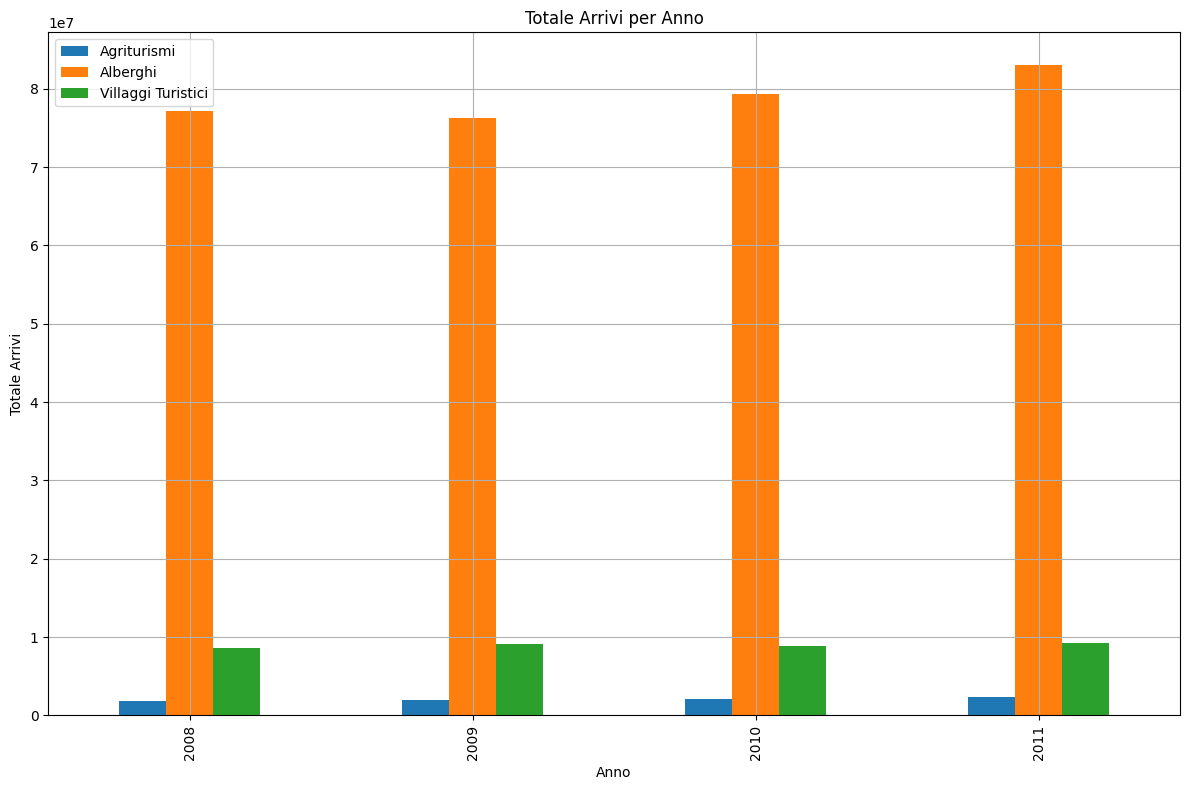

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def carica_dati(percorso_file):
    df = pd.read_csv(percorso_file, sep=';', encoding='UTF-8')
    if 'Anno' not in df.columns or 'Arrivi' not in df.columns:
        print(f"Errore: Il file {percorso_file} deve contenere le colonne 'Anno' e 'Arrivi'. Ecco le colonne disponibili: {df.columns}")
        return None
    return df

 #qui abbiamo escluso il 2012 siccome come anno c'è solo nel csv degli alberghi
def calcola_totali_per_anno(df):
    # Escludi l'anno 2012
    df = df[df['Anno'] != 2012]
    return df.groupby('Anno')['Arrivi'].sum()


def graficoTotaliArrivi(percorso_file1, percorso_file2, percorso_file3):
   # Carica i dati dai file
    df1 = carica_dati(percorso_file1)
    df2 = carica_dati(percorso_file2)
    df3 = carica_dati(percorso_file3)

    if df1 is None or df2 is None or df3 is None:
        print("Errore: Non è stato possibile caricare uno dei dataset.")
        return

    # Calcola i totali degli arrivi per anno
    totali1 = calcola_totali_per_anno(df1)
    totali2 = calcola_totali_per_anno(df2)
    totali3 = calcola_totali_per_anno(df3)

    # Unisci i dati per anno utilizzando un join esterno
    df_totali = pd.DataFrame(totali1).rename(columns={'Arrivi': 'Agriturismi'})
    df_totali = df_totali.join(pd.DataFrame(totali2).rename(columns={'Arrivi': 'Alberghi'}), how='outer')
    df_totali = df_totali.join(pd.DataFrame(totali3).rename(columns={'Arrivi': 'Villaggi Turistici'}), how='outer')

    # Riempie i valori NaN con 0
    df_totali = df_totali.fillna(0)

    # Crea il grafico a barre
    df_totali.plot(kind='bar', figsize=(12, 8))

    # Aggiungi etichette e titolo
    plt.xlabel('Anno')
    plt.ylabel('Totale Arrivi')
    plt.title('Totale Arrivi per Anno')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



graficoTotaliArrivi('/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-agriturismi-in-Italia-per-regione.csv',
                    '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv',
                    '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv')




Codice che mette in rilievo gli arrivi negli esercizi aberghieri, suddivisi per anno, nelle 5 regioni con più arrivi

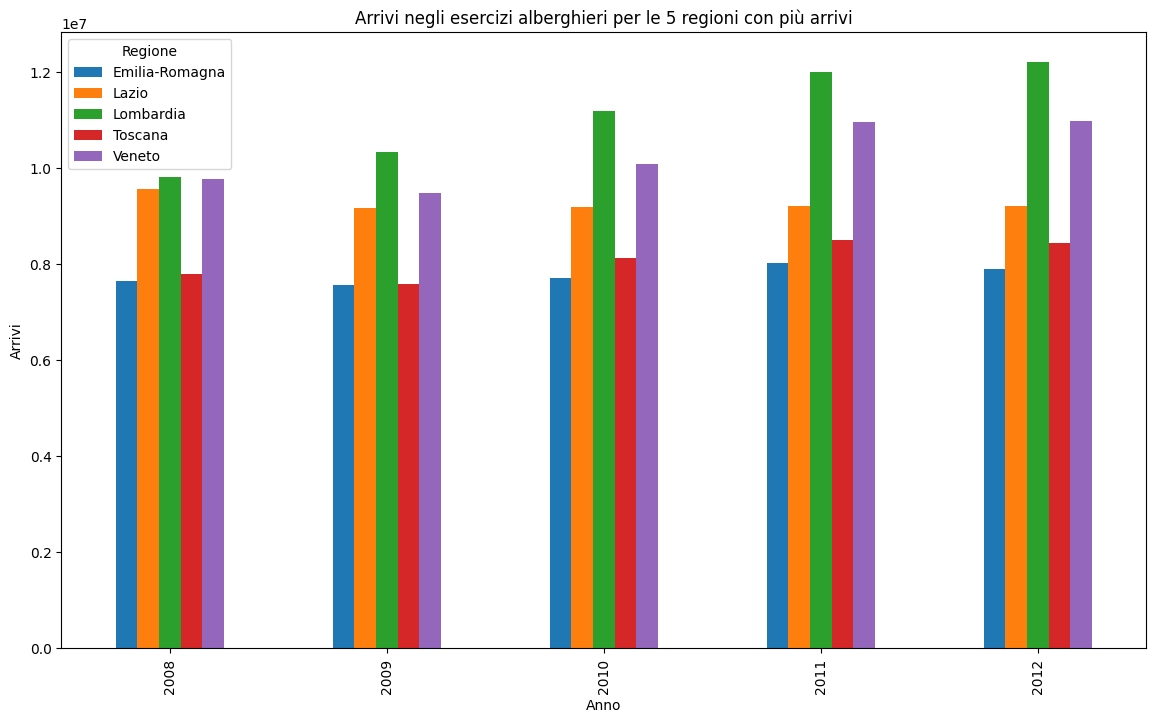

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def carica_modifica_dataset(url: str, separatore: str) -> pd.DataFrame:
  df = pd.read_csv(url, sep=separatore)

  df = df.rename(str.strip, axis = 'columns')
  return df

df = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")


df_grouped = df.groupby(['Anno', 'Regione']).sum().reset_index()
top_regions = df.groupby('Regione')['Arrivi'].sum().nlargest(5).index

df_top_regions = df[df['Regione'].isin(top_regions)]

df_pivot = df_top_regions.pivot(index='Anno', columns='Regione', values='Arrivi')

# Crea un grafico a barre raggruppate
df_pivot.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Anno')
plt.ylabel('Arrivi')
plt.title('Arrivi negli esercizi alberghieri per le 5 regioni con più arrivi')
plt.legend(title='Regione')
plt.show()


Codice che considera le presenze negli esercizi alberghieri, suddivisi per anno, nelle 5 regioni con più presenze

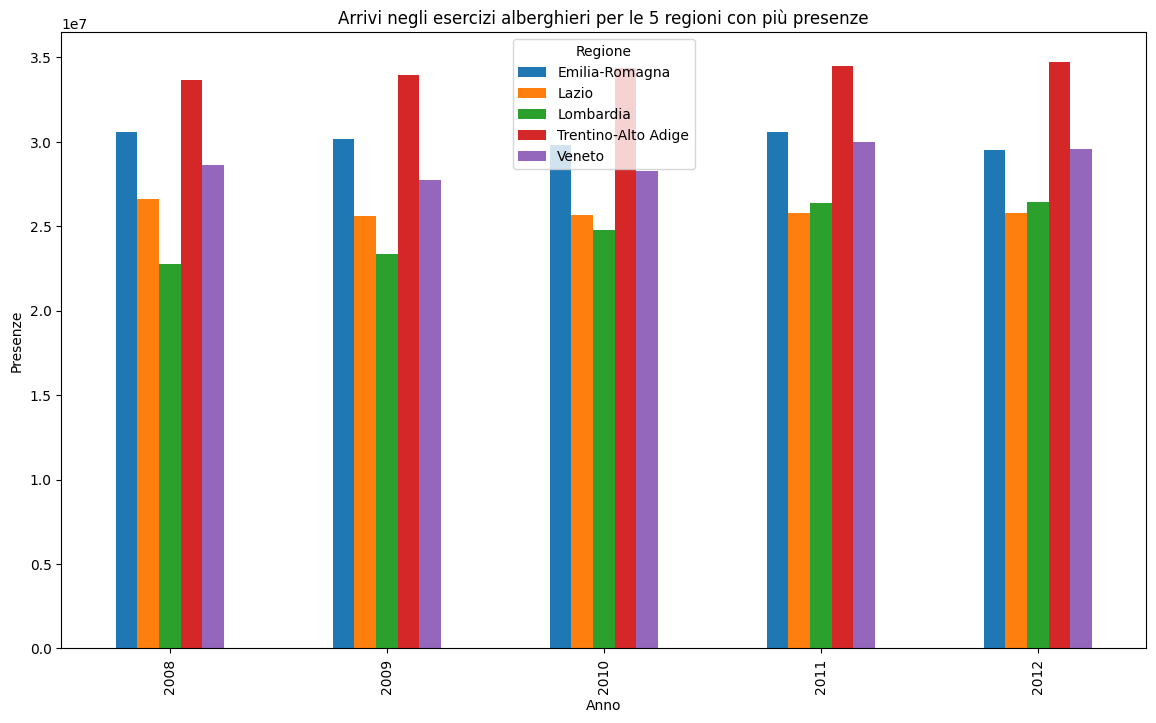

In [ ]:
def carica_modifica_dataset(url: str, separatore: str) -> pd.DataFrame:
  df = pd.read_csv(url, sep=separatore)

  df = df.rename(str.strip, axis = 'columns')
  return df

df = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")


df_grouped = df.groupby(['Anno', 'Regione']).sum().reset_index()
top_regions = df.groupby('Regione')['Presenze'].sum().nlargest(5).index

df_top_regions = df[df['Regione'].isin(top_regions)]

df_pivot = df_top_regions.pivot(index='Anno', columns='Regione', values='Presenze')

# Crea un grafico a barre raggruppate
df_pivot.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Anno')
plt.ylabel('Presenze')
plt.title('Arrivi negli esercizi alberghieri per le 5 regioni con più presenze')
plt.legend(title='Regione')
plt.show()



Codice che calcola la media degli arrivi negli esercizi alberghieri, suddivisi per regioni, in ordine crescente



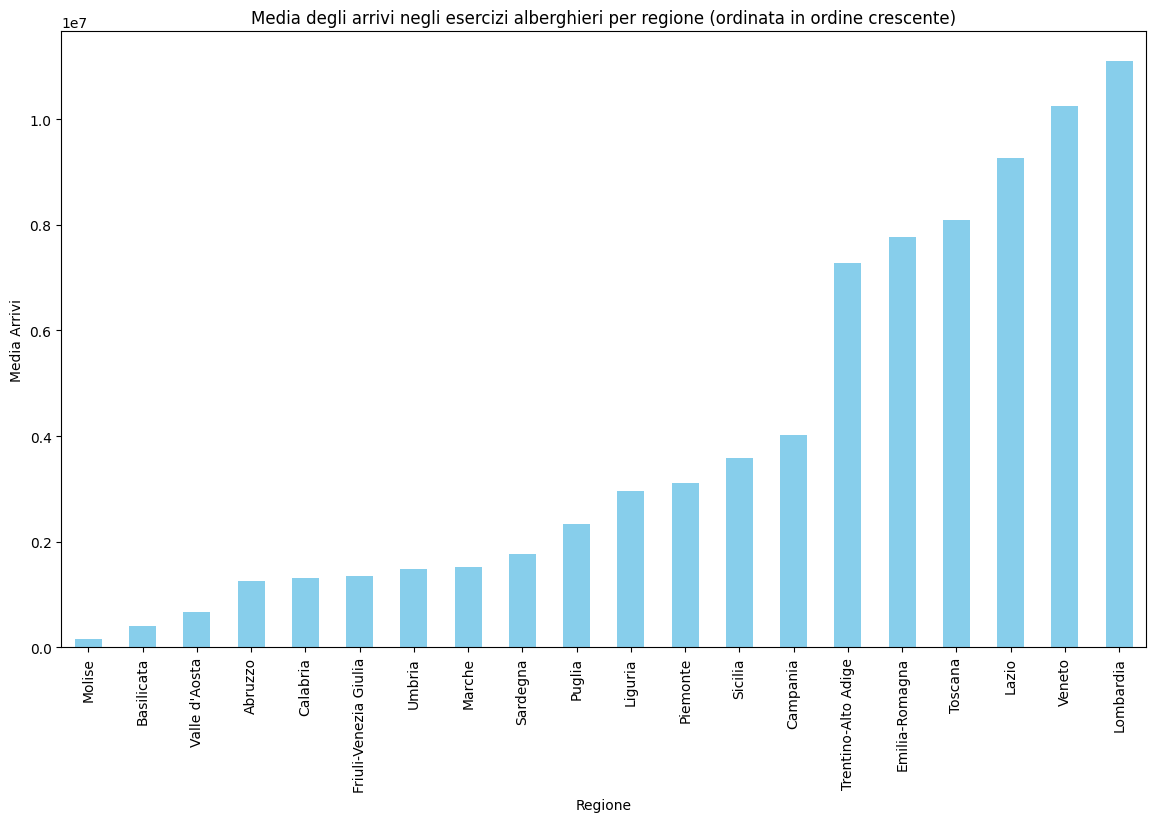

In [ ]:
def carica_modifica_dataset(url: str, separatore: str) -> pd.DataFrame:
  df = pd.read_csv(url, sep=separatore)

  df = df.rename(str.strip, axis = 'columns')
  return df

df = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")


mean_arrivi = df.groupby('Regione')['Arrivi'].mean()

# Ordina le regioni in base alla media degli arrivi in ordine crescente
mean_arrivi_sorted = mean_arrivi.sort_values()

# Crea un grafico a barre
mean_arrivi_sorted.plot(kind='bar', figsize=(14, 8), color='skyblue')
plt.xlabel('Regione')
plt.ylabel('Media Arrivi')
plt.title('Media degli arrivi negli esercizi alberghieri per regione (ordinata in ordine crescente)')
plt.show()

Codice che calcola la media delle presenze negli esercizi alberghieri, suddivisi per regione, in ordine crescente

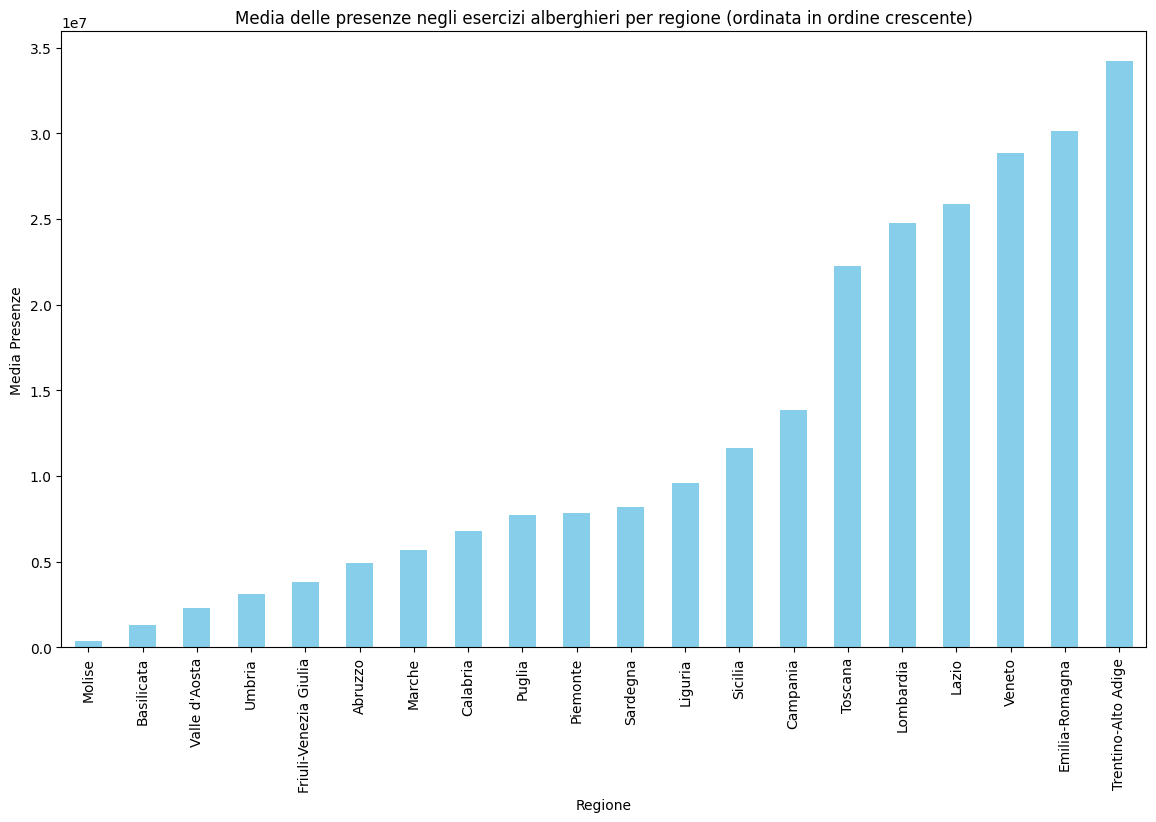

In [ ]:
def carica_modifica_dataset(url: str, separatore: str) -> pd.DataFrame:
  df = pd.read_csv(url, sep=separatore)

  df = df.rename(str.strip, axis = 'columns')
  return df


df = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")

mean_presenze = df.groupby('Regione')['Presenze'].mean()

mean_presenze_sorted = mean_presenze.sort_values()

# Crea un grafico a barre
mean_presenze_sorted.plot(kind='bar', figsize=(14, 8), color='skyblue')
plt.xlabel('Regione')
plt.ylabel('Media Presenze')
plt.title('Media delle presenze negli esercizi alberghieri per regione (ordinata in ordine crescente)')
plt.show()

Codice che calcola la media dei giorni trascorsi negli esercizi alberghieri suddivisi per regione, considerando i 4 anni, in ordine crescente

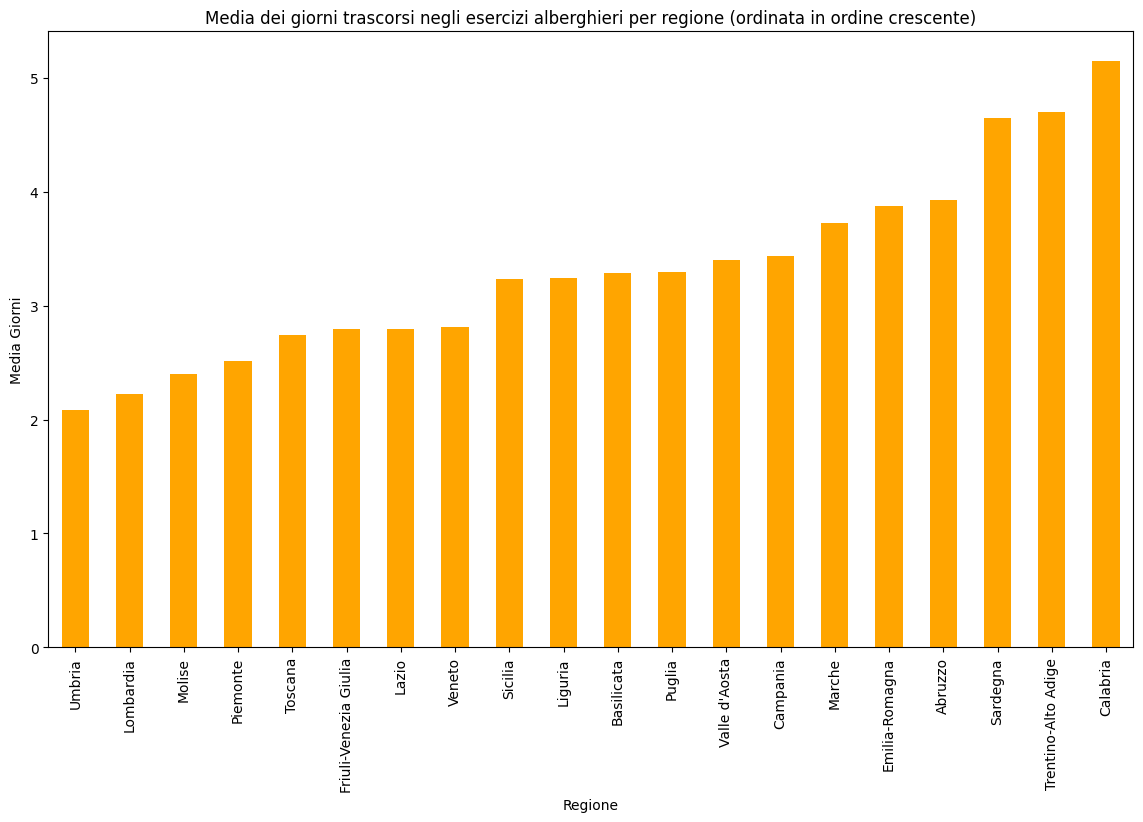

In [ ]:
df_arrivi = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")
df_presenze = carica_modifica_dataset("/content/drive/Shareddrives/Progetto_python/datasets/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv", ";")

# Calcola la media degli arrivi e delle presenze per ogni regione
mean_arrivi = df_arrivi.groupby('Regione')['Arrivi'].mean()
mean_presenze = df_presenze.groupby('Regione')['Presenze'].mean()

# Calcola la media dei giorni trascorsi per ogni regione
mean_giorni = mean_presenze / mean_arrivi

# Ordina i dati in base alla media dei giorni
mean_giorni_sorted = mean_giorni.sort_values()

# Crea un grafico a barre
mean_giorni_sorted.plot(kind='bar', figsize=(14, 8), color='orange')
plt.xlabel('Regione')
plt.ylabel('Media Giorni')
plt.title('Media dei giorni trascorsi negli esercizi alberghieri per regione (ordinata in ordine crescente)')
plt.show()

Codice che, grazie ad un menù a tendina dove sono elencate le regioni e un altro dove sono elencati gli anni, consente all'utente di visualizzare gli arrivi negli esercizi alberghieri, nei villaggi turistici e negli agriturismi di una determinata regione e di un determinato anno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def carica_dati(percorso_file):
    df = pd.read_csv(percorso_file, sep=';', encoding='UTF-8')
    if 'Anno' not in df.columns or 'Arrivi' not in df.columns or 'Regione' not in df.columns:
        print(f"Errore: Il file {percorso_file} deve contenere le colonne 'Anno', 'Arrivi' e 'Regione'. Ecco le colonne disponibili: {df.columns}")
        return None
    return df

def filtra_dati(df, regione, anno):
    # Filtra i dati per regione e anno
    df_filtrato = df[(df['Regione'] == regione) & (df['Anno'] == anno)]
    return df_filtrato['Arrivi'].sum()

def graficoArriviPerRegioneEAnno(b, percorso_file1, percorso_file2, percorso_file3, regione, anno):
    # Cancella il contenuto precedente dell'output
    output_grafico.clear_output()

    with output_grafico:
        # Carica i dati dai file
        df1 = carica_dati(percorso_file1)
        df2 = carica_dati(percorso_file2)
        df3 = carica_dati(percorso_file3)

        if df1 is None or df2 is None or df3 is None:
            print("Errore: Non è stato possibile caricare uno dei dataset.")
            return

        # Filtra i dati per regione e anno
        arrivi1 = filtra_dati(df1, regione, anno)
        arrivi2 = filtra_dati(df2, regione, anno)
        arrivi3 = filtra_dati(df3, regione, anno)

        # Crea un dataframe per i dati filtrati
        df_arrivi = pd.DataFrame({
            'Dataset': ['Agriturismi', 'Alberghi', 'Villaggi Turistici'],
            'Arrivi': [arrivi1, arrivi2, arrivi3]
        })

        # Crea il grafico a barre
        plt.figure(figsize=(10, 6))
        plt.bar(df_arrivi['Dataset'], df_arrivi['Arrivi'], color=['blue', 'orange', 'green'])

        # Aggiungi etichette e titolo
        plt.xlabel('Dataset')
        plt.ylabel('Totale Arrivi')
        plt.title(f'Totale Arrivi per {regione} nel {anno}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Carica un file per ottenere le regioni e gli anni disponibili
df = carica_dati('/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv')

if df is not None:
    # Ottieni le regioni e gli anni unici
    regioni = df['Regione'].unique().tolist()
    anni = df['Anno'].unique().tolist()

    # Crea i menu a tendina
    menu_regioni = widgets.Dropdown(
        options=regioni,
        description='Regione:',
        disabled=False,
    )

    menu_anni = widgets.Dropdown(
        options=anni,
        description='Anno:',
        disabled=False,
    )

    # Bottone per generare il grafico
    bottone_genera_grafico = widgets.Button(description="Genera Grafico")

    # Output per contenere il grafico
    output_grafico = widgets.Output()

    # Funzione chiamata quando il bottone viene premuto per generare il grafico
    def genera_grafico(b):
        graficoArriviPerRegioneEAnno(None, '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-agriturismi-in-Italia-per-regione.csv',
                                       '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione (1).csv',
                                      '/content/drive/Shareddrives/Progetto_python/datasets/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv',
                                      menu_regioni.value, menu_anni.value)

    # Collega il bottone alla funzione
    bottone_genera_grafico.on_click(genera_grafico)

    # Mostra i menu a tendina, il bottone e l'output per il grafico
    display(menu_regioni, menu_anni, bottone_genera_grafico, output_grafico)
else:
    print("Errore: Il dataset non è stato caricato correttamente.")


Dropdown(description='Regione:', options=('Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige', 'Ve…

Dropdown(description='Anno:', options=(2008, 2009, 2010, 2011), value=2008)

Button(description='Genera Grafico', style=ButtonStyle())

Output()